In [6]:
import itertools

import numpy as np
from qutip import *
# some_file.py
# import sys
from qudit import *
# import scipy
import time
import IPython.display as disp
from tqdm.notebook import tqdm
import multiprocess as mp
import matplotlib.pyplot as plt


# sys.path.insert(1, 'C:\\Users\\shoha\\Documents\\GitHub\\grimsmo-paper-simulations')

# from measurements import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
ent = (tensor(basis(2,0),basis(2,0))+tensor(basis(2,1),basis(2,1))).unit()
ket2dm(ent).ptrace(1)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]

In [27]:
mixed = tensor(qeye(2),qeye(2)).unit()
mixed.ptracerace(1)

AttributeError: 'Qobj' object has no attribute 'ptracerace'

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

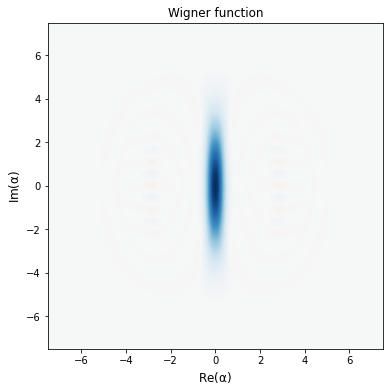

In [28]:
squeezed = squeeze(20,1) * basis(20,0)
plot_wigner(squeezed)

In [29]:
covariance_matrix([momentum(20),position(20)],squeezed)

array([[3.65256026, 0.        ],
       [0.        , 0.09894007]])

In [30]:
ent = (tensor(basis(2,0),basis(2,0))+tensor(basis(2,1),basis(2,1))).unit()
rho = ket2dm(ent)

In [31]:
rho_T_b = partial_transpose(rho,[0,1])
print(rho_T_b.norm())
print(rho.norm())

1.9999999999999996
0.9999999999999998


In [32]:
print(rho.eigenenergies())
print(rho_T_b.eigenenergies())

[0. 0. 0. 1.]
[-0.5  0.5  0.5  0.5]


In [33]:
phi_p=(tensor(basis(2,0),basis(2,0))+tensor(basis(2,1),basis(2,1))).unit()
uniliteral_y = tensor(qeye(2),sigmay())

In [34]:
uniliteral_y*phi_p

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.+0.j        ]
 [0.+0.70710678j]
 [0.-0.70710678j]
 [0.+0.j        ]]

In [40]:
N=60
M_class = CanonicalPhaseMeasurement(1 / np.sqrt(N) * sum([basis(N, i) for i in range(N)]), 2, num(N))

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

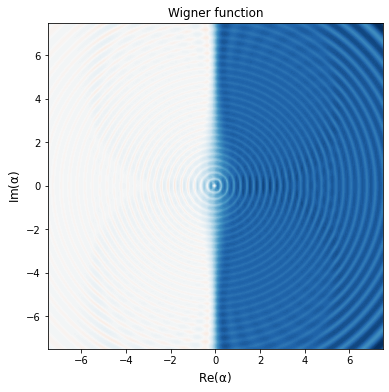

In [41]:
plot_wigner(M_class.POVM_elements[0])

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

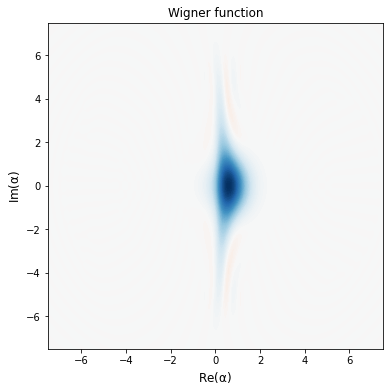

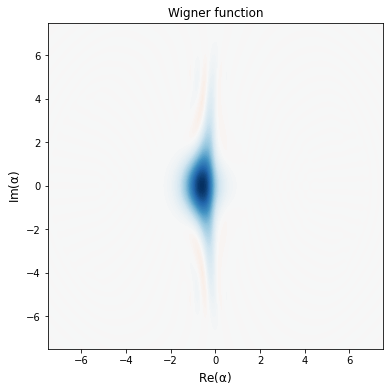

In [42]:
plot_wigner(M_class.POVM_elements[0]*basis(60,0))
plot_wigner(M_class.POVM_elements[M_class.get_possible_results()[1]]*basis(60,0))

In [ ]:
plot_wigner(sum([M_class.POVM_elements[theta]*basis(60,0) for theta in M_class.get_possible_results()]))

In [ ]:
M_class.get_possible_results()

In [ ]:
d = 2
N = 60
i = 0
    phi_plus = np.pi/d
    phi_minus = -np.pi/d
    d_l = [[(np.exp(1j * (m - n) * phi_plus) - np.exp(1j * (m - n) * phi_minus)) / (1j * (m - n)) if m != n else (phi_plus - phi_minus) for m in range(N)] for n in range(N)]

In [ ]:
proj = Qobj(np.array(d_l))

In [ ]:
plot_wigner(Qobj(proj)*basis(60,0))

In [ ]:
four_legged = BosonicQudit(60, 4)

In [ ]:
plot_wigner(four_legged.proj_op_list[1]*basis(60,0))

In [3]:
a = 4
N = 60
ent_coh = (tensor(coherent(N,a),coherent(N,a))+tensor(coherent(N,-a),coherent(N,-a))).unit()

In [4]:
a = 4
N = 60
d = 4
qudit = BosonicQudit(N,d)
sigma = qudit.cavity_to_qudit(ket2dm(coherent(N,a)))

C:\Users\shoha\PycharmProjects\bosonicDistillation\qudit.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma[i, j] = dphi * sum([self.basis_dict[(i, phi)].dag() * rho * self.basis_dict[(j, phi)]


In [5]:
sigma

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 9.99999975e-01 -5.40664025e-08  1.43563799e-09 -5.40664025e-08]
 [-5.40664889e-08  1.24288690e-08  6.11935139e-11 -1.46723383e-09]
 [ 1.43557033e-09  6.09859487e-11  4.01010266e-10  6.09859492e-11]
 [-5.40664889e-08 -1.46723383e-09  6.11935134e-11  1.24288690e-08]]

In [ ]:
sigma = np.array(tensor(qeye(d), sigmax()))

In [ ]:
b = Qobj(sigma)
b.dims = [[4,2],[4,2]]
b.ptrace(0)

In [ ]:
tensor(qeye(d), sigmax())

In [ ]:
from tqdm import tqdm

In [ ]:
vec = np.linspace(0, 1, 100)

In [ ]:
for i in tqdm(vec):
    for j in range(1000000):
        pass

In [ ]:
a = 3
N = 20
U = (1j * np.pi / 2 * tensor(num(N), num(N))).expm()
ent_coh = (tensor(coherent(N,a),coherent(N,a)))#+tensor(coherent(N,-a),coherent(N,-a))).unit()

plot_wigner((U*ent_coh).ptrace(0))
M_class = CanonicalPhaseMeasurement(1 / np.sqrt(N) * sum([basis(N, i) for i in range(N)]), 4, num(N))
plot_wigner(
    (tensor(M_class.POVM_elements[M_class.get_possible_results()[0]],qeye(N)) 
     * U*ent_coh).ptrace(1))

In [ ]:
fidelity(
    (tensor(M_class.POVM_elements[M_class.get_possible_results()[0]],qeye(N)) 
     * U*ent_coh).ptrace(1).unit(),
    L0.unit())

In [ ]:
L0 = coherent(N,a) + coherent(N, 1j * a) + coherent(N, -a) + coherent(N, -1j * a)
L1 = coherent(N,a) + 1j * coherent(N, 1j * a) - coherent(N, -a) - 1j * coherent(N, -1j * a)
L2 = coherent(N,a) - coherent(N, 1j * a) + coherent(N, -a) - coherent(N, -1j * a)
plot_fock_distribution(L0)

In [ ]:
phi_p = (tensor(basis(2,0),basis(2,0)) + tensor(basis(2,1),basis(2,1))).unit()
phi_m = (tensor(basis(2,0),basis(2,0)) - tensor(basis(2,1),basis(2,1))).unit()
psi_p = (tensor(basis(2,0),basis(2,1)) + tensor(basis(2,1),basis(2,0))).unit()
psi_m = (tensor(basis(2,0),basis(2,1)) - tensor(basis(2,1),basis(2,0))).unit()
EPR_list = [phi_p, phi_m, psi_p, psi_m]
no_match = ket2dm(phi_p) + ket2dm(psi_p)
print(entropy.negativity(no_match,2,logarithmic=True))
print(entropy.concurrence(no_match))

In [ ]:
EPR_basis_list = [tensor(EPR1,EPR2) for EPR1, EPR2 in itertools.product(EPR_list,EPR_list)]

In [ ]:
sum([tensor(basis(4,i),basis(4,i)) for i in range(4)]).unit().full()

In [ ]:
plus_0 = sum([ 1j**i *tensor(basis(4,i),basis(4,i)) for i in range(4)])

In [ ]:
# create plus vector list
plus_basis_list = []
for base_number in range(4):
    plus_basis_list.append(sum([ 1j**(i*base_number) * basis(4,i) for i in range(4)]))
    
tensor_plus_basis_list = [tensor(alice_plus,bob_plus).unit() for alice_plus, bob_plus in itertools.product(plus_basis_list,plus_basis_list)]

In [ ]:
dit = lambda a,b: tensor(basis(4,a),basis(4,b))
zpzp2p2p_after_loss = (dit(0,0)-dit(0,2)+1j*dit(1,1) - 1j * dit(1,3) + dit(2,0) - dit(2,2) + 1j * dit(3,1) - 1j * dit(3,3)).unit()
#zpzp2p2p_after_loss.transform(tensor_plus_basis_list).full()
phi_p_phi_p = (dit(0,0)+dit(1,1)+dit(2,2) + dit(3,3)).unit()
phi_p_phi_p.transform(tensor_plus_basis_list).full()

In [ ]:
sum([1j**i * tensor(basis(4,i),basis(4,i)) for i in range(4)]).unit().transform(tensor_plus_basis_list).full()

In [ ]:
(tensor_plus_basis_list[0]+tensor_plus_basis_list[2*4+2]).full() # 0_+,0_+ + 2_p,2_p

In [ ]:
p1 = 0.1
p2 = p1**2
psi = (tensor(basis(2,0),basis(2,0),basis(2,0),basis(2,0))
       +tensor(basis(2,0),basis(2,1),basis(2,0),basis(2,1))
       +tensor(basis(2,1),basis(2,0),basis(2,1),basis(2,0))
       +tensor(basis(2,1),basis(2,1),basis(2,1),basis(2,1))).unit()

phi_err1 = (tensor(basis(2,0),basis(2,0),basis(2,0),basis(2,1))
           +tensor(basis(2,0),basis(2,1),basis(2,1),basis(2,0))
           +tensor(basis(2,1),basis(2,0),basis(2,1),basis(2,1))
           +tensor(basis(2,1),basis(2,1),basis(2,0),basis(2,0))).unit()

phi_err2 = (tensor(basis(2,0),basis(2,0),basis(2,1),basis(2,1))
           +tensor(basis(2,0),basis(2,1),basis(2,0),basis(2,0))
           +tensor(basis(2,1),basis(2,0),basis(2,0),basis(2,1))
           +tensor(basis(2,1),basis(2,1),basis(2,1),basis(2,0))).unit()

phi_err3 = (tensor(basis(2,0),basis(2,0),basis(2,1),basis(2,0))
           +tensor(basis(2,0),basis(2,1),basis(2,1),basis(2,1))
           +tensor(basis(2,1),basis(2,0),basis(2,0),basis(2,0))
           +tensor(basis(2,1),basis(2,1),basis(2,0),basis(2,1))).unit()

rho = (1 - 2*p1-p2)*ket2dm(psi) + p1 * (ket2dm(phi_err1) + ket2dm(phi_err2)) + p2 * ket2dm(phi_err3)

In [ ]:
rho.transform(basis_list)

In [ ]:
def p_theta(gamma,theta):
    return np.exp(- theta**2 / (2*gamma)) / np.sqrt(2 * pi * gamma)

def p_theta_pi(gamma, theta):
    return p_theta(gamma, theta+np.pi)+p_theta(gamma, theta - np.pi)

In [ ]:
s_phi_p = '00+11'
s_phi_m = '00-11'
s_psi_p = '01+10'
s_psi_m = '01-10'
s_EPR = [s_phi_p, s_phi_m,s_psi_m,s_psi_p]

EPR_dict = {
    '00+11': '\Phi^{+}',
    '00-11': '\Phi^{-}',
    '01+10': '\Psi^{+}',
    '01-10': '\Psi^{-}'
}

sign_dict = {('+','+'): '+',
             ('+','-'): '-',
             ('-','+'): '-',
             ('-','-'): '+',
            }

to_d = lambda x,y: '\\left|' + str(int(x,2)) + str(int(y,2)) + '\\right\\rangle'

for i,j in itertools.product(s_EPR,s_EPR):
    new_string = (to_d(i[0]+j[0],i[1]+j[1])
                  + sign_dict[('+',j[2])]+to_d(i[0]+j[3],i[1]+j[4])
                  + sign_dict[('+',i[2])]+to_d(i[3]+j[0],i[4]+j[1])
                  + sign_dict[(j[2],i[2])]+to_d(i[3]+j[3],i[4]+j[4]))
    print(EPR_dict[i]+'\otimes'+EPR_dict[j]+' & '+new_string + '\\\\')

In [ ]:
new_string = (i[0]+j[0]+i[1]+j[1]
                  + sign_dict[('+',j[2])]+i[0]+j[3]+i[1]+j[4]
                  + sign_dict[('+',i[2])]+i[3]+j[0]+i[4]+j[1]
                  + sign_dict[(j[2],i[2])]+i[3]+j[3]+i[4]+j[4])
    

In [ ]:
def p_theta(gamma,theta):
    return np.exp(- theta**2 / (2*gamma)) / np.sqrt(2 * np.pi * gamma)

for d in [4]:
    res = 100
    gamma = 0.01
    angles = np.linspace(-np.pi,np.pi,res)
    p1_angles = angles[int(res/2/d+res/2):int(3*res/2/d+res/2)]
    p2_angles = angles[int(3*res/2/d+res/2):int(5*res/2/d+res/2)]
    Norm = sum(p_theta(gamma, angles))
    p1 = sum(p_theta(gamma, p1_angles))/Norm
    p2 = sum(p_theta(gamma, p2_angles))/Norm
    print(p1)
    print(p2)
    
#plt.plot(angles,p_theta(gamma, angles)/Norm)

In [ ]:
p2_angles

In [ ]:
int(5*res/2/d+res/2)

In [ ]:
print(tensor(basis(2, 0),basis(2, 1)).unit())

In [ ]:
qudit4 = EntangledQudit(4,4)

In [ ]:
print(qudit4.qudit_from_list([(1,0,0)]))
disp.Math(qudit4.print_qudit(qudit4.qudit_from_list([(1,0,0)])))

In [ ]:
qudit4.transform_to_fourier_basis(qudit4.qudit_from_list([(1,0,0)]))

In [ ]:
disp.Math("\\left( \\alpha \\right)")

In [ ]:
qudit8 = EntangledQudit(8,8)
qudit_list = [(1,0,0), (1,2,2), (1,4,4), (1,6,6)]
base_state = qudit8.qudit_from_list(qudit_list)
after_trans = qudit8.transform_to_fourier_basis(base_state)
a = disp.Math(qudit8.print_qudit(after_trans))

In [ ]:
after_trans.full()

In [ ]:
qudit_list = [(1,0,0), (1,0,4), (1,4,0), (1,4,4),(1,2,2), (1,2,6), (1,6,2), (1,6,6)]
base_state = qudit8.qudit_from_list(qudit_list)
after_trans = qudit8.transform_to_fourier_basis(base_state, reverse=True)

In [ ]:
after_trans.full

In [ ]:
print(a)

In [2]:
qudit64 = EntangledQudit(64,64)
m = 32
delta = int(64/m)
print(f"delta is {delta}")
qudit_list = [(1,delta*i,delta*i) for i in range(m)]
base_state = qudit64.qudit_from_list(qudit_list)
after_trans = qudit64.transform_to_fourier_basis(base_state)
disp.Math(qudit64.print_qudit(after_trans))

delta is 2


<IPython.core.display.Math object>

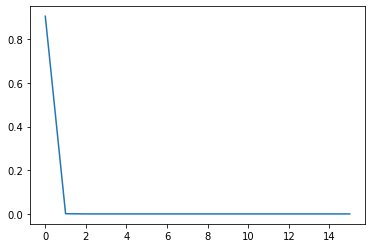

In [9]:
qudit64 = EntangledQudit(64,64)
plt.plot([qudit64.quditA.p_loss(0.001,i, alpha=100) for i in range(16)])

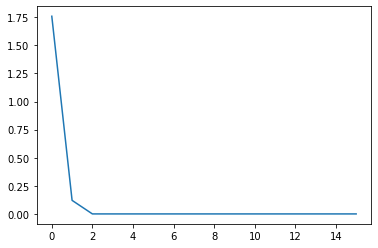

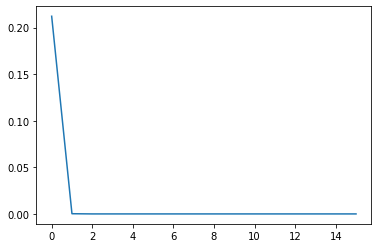

In [7]:
qudit64 = EntangledQudit(64,64)
plt.plot([qudit64.quditA.p_dephasing(0.001,i) for i in range(16)])
plt.figure()
plt.plot([qudit64.p(1e-3,1e-3, 0,1,i,0) for i in range(16)])

In [87]:
A_1, B_1 = 3, 1
A_2, B_2 = 1, 1
qudit4.fidelity_specific(gamma_loss_A=1e-2,gamma_dephasing_A=1e-2, A_1=A_1,B_1=B_1,A_2=A_2,B_2=B_2,m_i=m_i,m_c=m_c)

KeyboardInterrupt: 

In [3]:
d = 16
qudit4 = EntangledQudit(d,d)
m_i = 8
m_c = 8
gamma_list = np.logspace(-3,0,20)  # [1e-3]

In [5]:
fid_list8 = []
for gamma in tqdm(gamma_list,total=20):
    fidelity_sum = 0
    prob_sum = 0
    for A_1,B_1,A_2,B_2 in itertools.product(range(int(d / m_c)),range(int(d / m_c)),range(int(m_c/2)),range(int(m_c/2))):  # , total = int(d/2*d/2)):
        fid = qudit4.fidelity_specific(gamma_loss_A=gamma,gamma_dephasing_A=gamma, A_1=A_1,B_1=B_1,A_2=A_2,B_2=B_2,m_i=m_i,m_c=m_c)
        # print(f"{fid=}")
        prob = qudit4.probability_specific(gamma_loss_A=gamma,gamma_dephasing_A=gamma, A_1=A_1,B_1=B_1,A_2=A_2,B_2=B_2,m_i=m_i,m_c=m_c)
        # print(f"{prob=}")
        if prob!=0:
            fidelity_sum += prob * fid
            prob_sum += prob
        # print(f"{A_1,B_1,A_2,B_2=},{fid=}, {prob=}")
    #print(fidelity_sum)
    #print(prob_sum)
    #print(fidelity_sum/prob_sum)
    fid_list8.append(fidelity_sum/prob_sum)

  0%|          | 0/20 [00:00<?, ?it/s]

In [26]:
fid_list_filtered = []
fidelity_cut = 0.999
fail_prob_list = []
for gamma in tqdm(gamma_list,total=20):
    fidelity_sum = 0
    prob_sum = 0
    good_prob = 0
    for A_1,B_1,A_2,B_2 in itertools.product(range(int(d / m_c)),range(int(d / m_c)),range(int(m_c/2)),range(int(m_c/2))):  # , total = int(d/2*d/2)):
        fid = qudit4.fidelity_specific(gamma_loss_A=gamma,gamma_dephasing_A=gamma, A_1=A_1,B_1=B_1,A_2=A_2,B_2=B_2,m_i=m_i,m_c=m_c)
        # print(f"{fid=}")
        prob = qudit4.probability_specific(gamma_loss_A=gamma,gamma_dephasing_A=gamma, A_1=A_1,B_1=B_1,A_2=A_2,B_2=B_2,m_i=m_i,m_c=m_c)
        # print(f"{prob=}")
        if prob!=0:
            if fid >= fidelity_cut:
                fidelity_sum += prob * fid
                good_prob += prob
            prob_sum += prob
        # print(f"{A_1,B_1,A_2,B_2=},{fid=}, {prob=}")
    #print(fidelity_sum)
    #print(prob_sum)
    #print(fidelity_sum/prob_sum)
    if good_prob > 0:
        fid_list_filtered.append(fidelity_sum/good_prob)
    else:
        fid_list_filtered.append(0)
        print(gamma)
    fail_prob_list.append((prob_sum-good_prob)/prob_sum)

  0%|          | 0/20 [00:00<?, ?it/s]

0.0379269019073225
0.05455594781168517
0.07847599703514611
0.11288378916846883
0.1623776739188721
0.23357214690901212
0.3359818286283781
0.4832930238571752
0.6951927961775606
1.0


In [27]:
fail_prob_list

[1.065657740584166e-09,
 4.5083891600206477e-07,
 3.169942254763924e-05,
 0.0006386635042214135,
 0.005377766417528581,
 0.024543998052987487,
 0.07256353730643812,
 0.15721184975200875,
 0.27233596959007983,
 0.40137931713253394,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

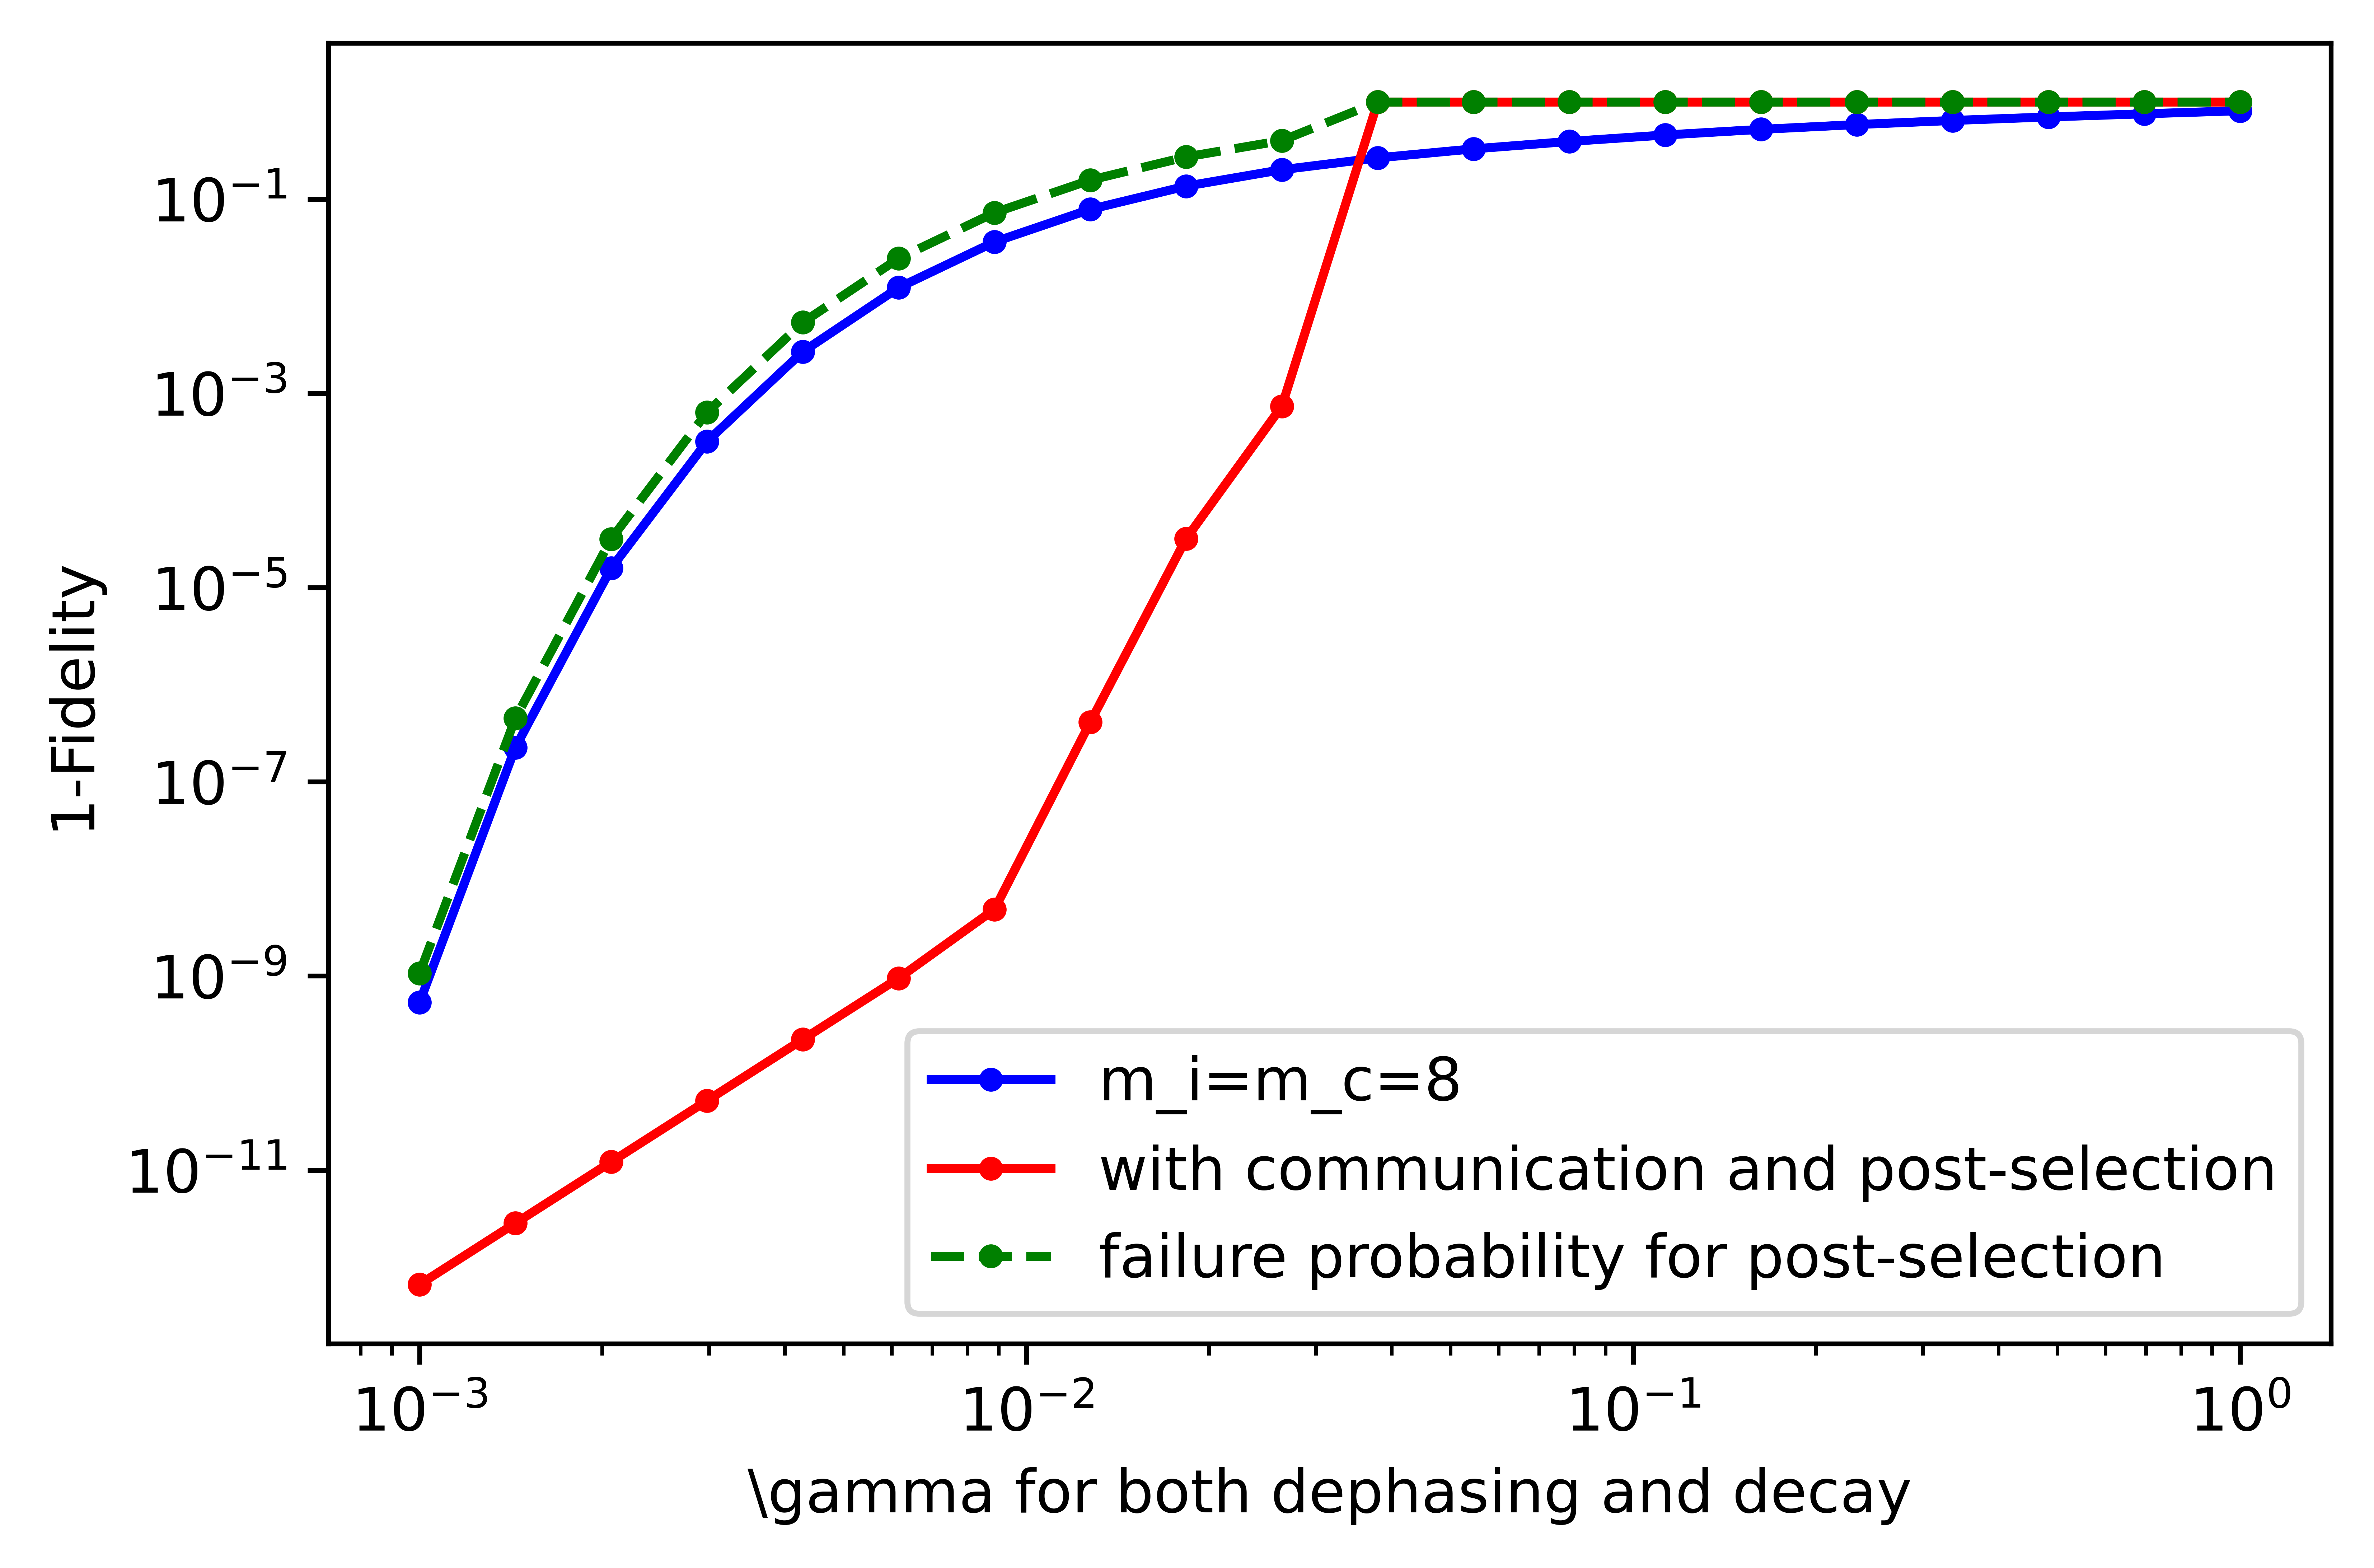

In [36]:
plt.figure(dpi=1200)

plt.loglog(gamma_list,1-np.array(fid_list8), 'b.-')
plt.loglog(gamma_list,1-np.array(fid_list_filtered), 'r.-')
plt.loglog(gamma_list,np.array(fail_prob_list), 'g.--')

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel("\gamma for both dephasing and decay")
plt.ylabel("1-Fidelity")
plt.legend(["m_i=m_c=8","with communication and post-selection","failure probability for post-selection"])

In [10]:
pool = mp.Pool(mp.cpu_count())

def trivial_fidelity_for_parallel(gamma, d=d, qudit4=qudit4,m_i=m_i):
    import itertools
    print(m_i)
    fid_prob = sum([(qudit4.fidelity_trivial(m_i,s_A,s_B,l_A,l_B)
                     * qudit4.p(gamma_loss_A=gamma, gamma_dephasing_A=gamma, s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B))
                    for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))])
    prob = sum([qudit4.p(gamma_loss_A=gamma, gamma_dephasing_A=gamma,
                s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B)
                for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))])
    return fid_prob/prob

# trivial_fidelity_for_parallel(1e-3)
fid_triv_list8 = pool.map(trivial_fidelity_for_parallel, list(gamma_list))

In [4]:
mp.cpu

NameError: name 'trivial_fidelity_for_parallel' is not defined

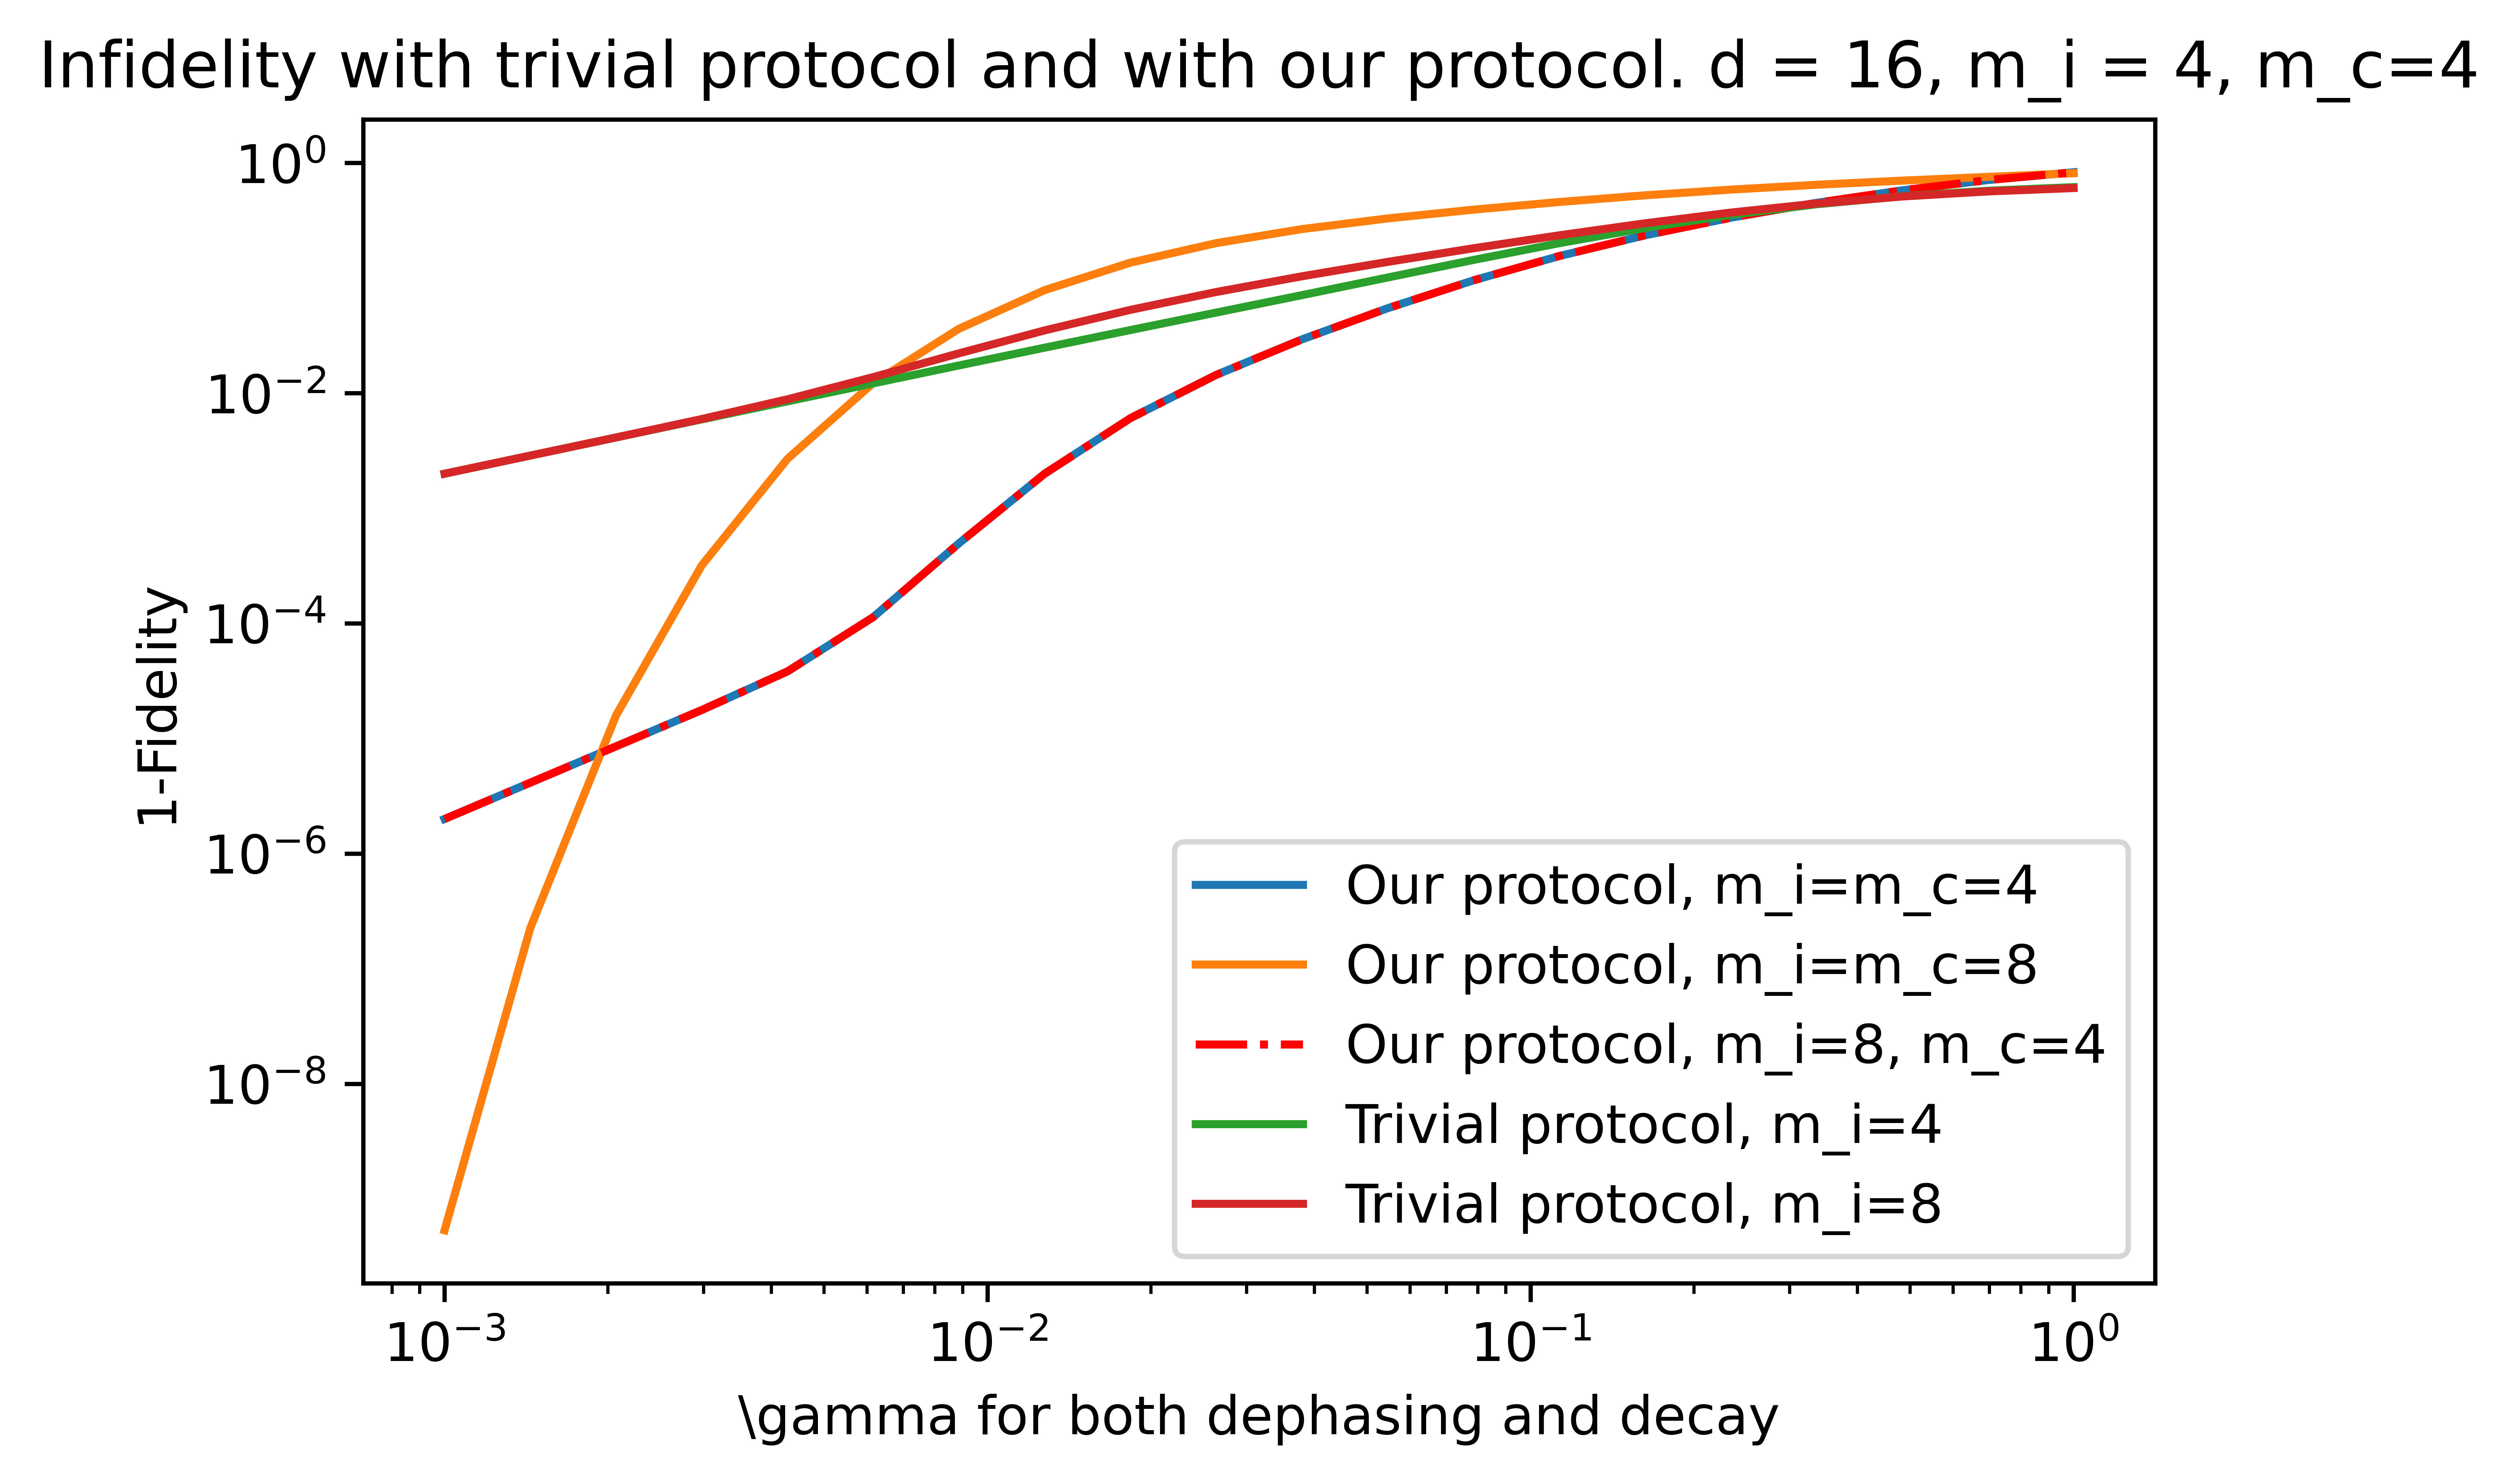

In [21]:
plt.figure(dpi=1200)

plt.loglog(gamma_list,1-np.array(fid_list4))
plt.loglog(gamma_list,1-np.array(fid_list8))
plt.loglog(gamma_list,1-np.array(fid_list4d8), "r-.")
plt.loglog(gamma_list,1-np.array(fid_triv_list))
plt.loglog(gamma_list,1-np.array(fid_triv_list8))

plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel("\gamma for both dephasing and decay")
plt.ylabel("1-Fidelity")
plt.legend(["Our protocol, m_i=m_c=4","Our protocol, m_i=m_c=8","Our protocol, m_i=8, m_c=4","Trivial protocol, m_i=4","Trivial protocol, m_i=8"])

In [103]:
2*sum([qudit4.p(gamma_loss_A=gamma_list[0], gamma_dephasing_A=gamma_list[0],
              s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B)
        for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))])

8.016016010672006

In [ ]:
for gamma in gamma_list:
    qudit4.

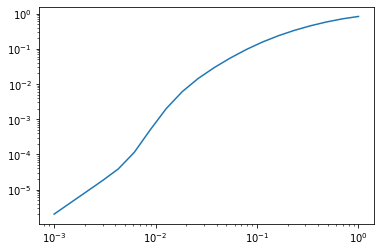

In [101]:
plt.loglog(gamma_list,1-np.array(fid_list))

In [3]:
def add_noise_B(N, dm_state, tk_B, tk_phi_B):  # only second cavity
    E_tk = np.sqrt(tk_B) * tensor(qeye(N),destroy(N))
    E_tk_phi = np.sqrt(tk_phi_B) * tensor(qeye(N),num(N))
    E_0 = tensor(qeye(N),qeye(N)) - 1/2 * E_tk.dag()*E_tk - 1/2 * E_tk_phi.dag() * E_tk_phi
    new_state = E_0.dag() * dm_state * E_0 + E_tk.dag() * dm_state * E_tk + E_tk_phi.dag() * dm_state * E_tk_phi
    return new_state

In [19]:
N=100

coh = coherent(N,3)
pegg_bernett = sum([basis(N, i) for i in range(N)]).unit()

base_state = pegg_bernett
rotation = lambda theta: (theta * 1.0j * num(N)).expm()
entangled_state_2_ebits = (tensor(base_state, base_state) + tensor(rotation(np.pi) * base_state, rotation(np.pi) * base_state)).unit()
entangled_state_4_ebits = (tensor(base_state, base_state) + tensor(rotation(np.pi / 2) * base_state, rotation(np.pi / 2) * base_state)
                           + tensor(rotation(np.pi) * base_state, rotation(np.pi) * base_state)
                           + tensor(rotation(3/2 * np.pi) * base_state, rotation(3 / 2 * np.pi) * base_state)).unit()

starting_state = tensor(base_state, base_state)  # tensor(pegg_bernett,pegg_bernett)
sig_noise = add_noise(N, ket2dm(starting_state), 0, 0.1).unit()


(0.0053036672882258926+0j)

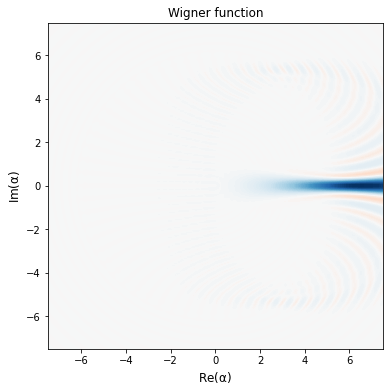

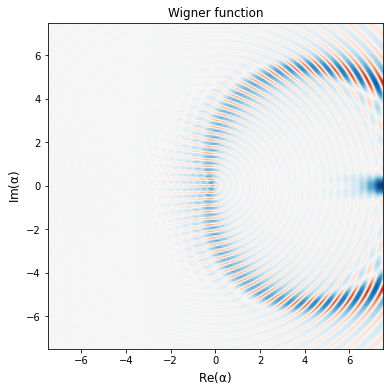

In [20]:
M_class = CanonicalPhaseMeasurement(1 / np.sqrt(N) * sum([basis(N, i) for i in range(N)]), 2, num(N))
plot_wigner(starting_state.ptrace(1))
plot_wigner(sig_noise.ptrace(1)) # tensor(M_class.POVM_elements[0] *
#plot_wigner(M_class.POVM_elements[0] * sig_noise.ptrace(1)) #  *
#plot_wigner(M_class.POVM_elements[M_class.get_possible_results()[1]] * sig_noise.ptrace(1))
np.trace(M_class.POVM_elements[M_class.get_possible_results()[1]] * sig_noise.ptrace(0))

In [27]:
def add_noise(N, dm_state, tk_B, tk_phi_B):
    E_tk = np.sqrt(tk_B) * destroy(N)
    E_tk_phi = np.sqrt(tk_phi_B) * num(N)
    E_0 = qeye(N) - 1/2 * E_tk.dag()*E_tk - 1/2 * E_tk_phi.dag() * E_tk_phi
    new_state = E_0.dag() * dm_state * E_0 + E_tk.dag() * dm_state * E_tk + E_tk_phi.dag() * dm_state * E_tk_phi
    return new_state

In [85]:
N=200

coh = coherent(N,8)
pegg_bernett = sum([basis(N, i) for i in range(N)]).unit()

base_state = coh
sig_noise = add_noise(N, ket2dm(base_state), 0, 0.001).unit()

In [86]:
d = 16
M_class = CanonicalPhaseMeasurement(1 / np.sqrt(N) * sum([basis(N, i) for i in range(N)]), d, num(N))
for i in range(d):
    print(np.trace(M_class.POVM_elements[M_class.get_possible_results()[i]] * sig_noise))

print(1-sum([np.trace(M_class.POVM_elements[M_class.get_possible_results()[i]] * sig_noise) for i in range(d)]))

(0.9977442683928366+0j)
(0.0011275494635837214+9.489182917622567e-13j)
(-3.3467836741733894e-13-3.464165580667876e-13j)
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
(-3.3458033455680754e-13+3.464208691305628e-13j)
(0.0011275494635837454-9.48913067263038e-13j)
(6.326806653023098e-07-9.535562993878364e-18j)


(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

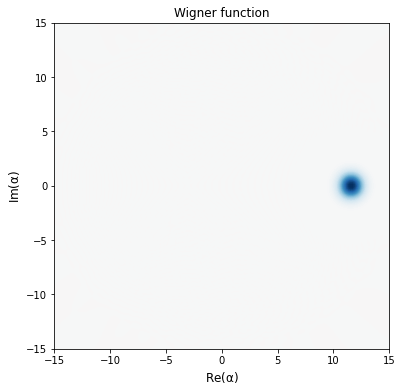

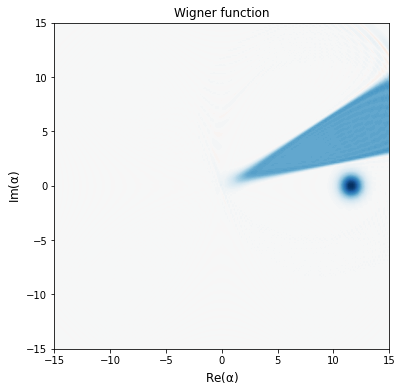

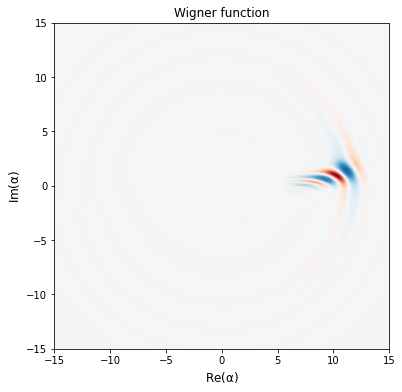

In [87]:
plot_wigner(sig_noise, alpha_max=15)
plot_wigner(M_class.POVM_elements[M_class.get_possible_results()[1]] + sig_noise, alpha_max=15)
plot_wigner(M_class.POVM_elements[M_class.get_possible_results()[1]] * sig_noise, alpha_max=15)

In [55]:
a = np.array([i[1] for i in x.items()])

In [57]:
-np.sort(-a)[4]

4.3683330858935415e-08

In [53]:
a[0].type

AttributeError: 'numpy.float64' object has no attribute 'type'

In [60]:
list(x.values()).index(-np.sort(-a)[4])

520

In [62]:
list(x.keys())[520]

'0.0, 4.0, 1, 1'

In [161]:
d = 4
m_i = 4
l_A,l_B,s_A,s_B = 1,0,0,0
Delta = int(d/m_i)
initial = 1/np.sqrt(d) * sum([np.exp(2j * np.pi * (l_A+l_B) * Delta * k) *
                       tensor(basis(d, (Delta * k+s_A) % d),
                              basis(d, (Delta * k+s_B) % d))
                       for k in range(m_i)])

In [163]:
initial.full

<bound method Qobj.full of Quantum object: dims = [[4, 4], [1, 1]], shape = (16, 1), type = ket
Qobj data =
[[0.5]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.5]]>

In [3]:
fid_prob = sum([(qudit4.fidelity_trivial(4,s_A,s_B,l_A,l_B)
                 * qudit4.p(gamma_loss_A=1e-3, gamma_dephasing_A=1e-3, s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B))
                for s_A,s_B,l_A,l_B in tqdm(itertools.product(range(d),range(d), range(d), range(d)))])
print(fid_prob)
prob = sum([qudit4.p(gamma_loss_A=gamma_list[0], gamma_dephasing_A=gamma_list[0],
              s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B)
        for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))])
fid_prob/prob

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [13]:
start = time.time()
for i in range(100):
    qudit4.fidelity_trivial(4,0,0,2,0)
end = time.time()
print(end - start)


1.2769849300384521


In [132]:
 qudit4.d_A

16

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

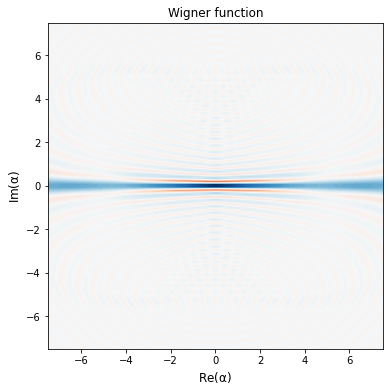

In [39]:
N=60
rotation = lambda theta: (theta * 1.0j * num(N)).expm()
base_state_dic = {0: 1 / np.sqrt(N) * sum([basis(N, 2*i) for i in range(int(N/2))]),
                  1: 1 / np.sqrt(N) * sum([basis(N, 2*i+1) for i in range(int(N/2)-1)])
                 }

# state = (sum([basis(N,2*i) for i in range(5,10)])).unit()
state0 = (coherent(N,5) + coherent(N,-5)).unit()
state1 = (coherent(N,5) - coherent(N,-5)).unit()

# plot_wigner(base_state)

# plot_wigner(sum([rotation(theta) * base_state for theta in np.linspace(-np.pi/2,np.pi/2,1000)]))

# print([(state.dag() * rotation(theta) * base_state, theta) for theta in np.linspace(-np.pi/2,np.pi/2,1000)])
# print(sum([(state.dag() * rotation(theta) * base_state) for theta in np.linspace(-np.pi/2,np.pi/2,1000)]))
# print([(abs((state.dag() * rotation(theta) * base_state)[0]), theta) for theta in np.linspace(-np.pi/2,np.pi/2,1000)])

In [42]:
decodeij = lambda i,j,state: sum([((rotation(theta) * base_state_dic[i]).dag() * ket2dm(state) * rotation(theta) * base_state_dic[j]) for theta in np.linspace(-np.pi/2,np.pi/2,1000)])
statep = (state0+state1).unit()
print(decodeij(0,0,statep))
print(decodeij(0,1,statep))
print(decodeij(1,0,statep))
print(decodeij(1,1,statep))
# print(decode((state0+state1).unit()))

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[8.325]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[8.32499994]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[8.32499994]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[8.3249999]]


In [ ]:
N=60
rotation = lambda theta: (theta * 1.0j * num(N)).expm()
base_state_dic = {0: 1 / np.sqrt(N) * sum([basis(N, 2*i) for i in range(int(N/2))]),
                  1: 1 / np.sqrt(N) * sum([basis(N, 2*i+1) for i in range(int(N/2)-1)])
                 }

# state = (sum([basis(N,2*i) for i in range(5,10)])).unit()
state0 = (coherent(N,5) + coherent(N,-5)).unit()
state1 = (coherent(N,5) - coherent(N,-5)).unit()


decodeij = lambda i,j,state: sum([((rotation(theta) * base_state_dic[i]).dag() * ket2dm(state) * rotation(theta) * base_state_dic[j]) for theta in np.linspace(-np.pi/2,np.pi/2,1000)])
statep = (state0+state1).unit()
print(decodeij(0,0,statep))
print(decodeij(0,1,statep))
print(decodeij(1,0,statep))
print(decodeij(1,1,statep))

# plot_wigner(base_state)

# plot_wigner(sum([rotation(theta) * base_state for theta in np.linspace(-np.pi/2,np.pi/2,1000)]))

# print([(state.dag() * rotation(theta) * base_state, theta) for theta in np.linspace(-np.pi/2,np.pi/2,1000)])
# print(sum([(state.dag() * rotation(theta) * base_state) for theta in np.linspace(-np.pi/2,np.pi/2,1000)]))
# print([(abs((state.dag() * rotation(theta) * base_state)[0]), theta) for theta in np.linspace(-np.pi/2,np.pi/2,1000)])

In [12]:
sum([rotation(theta) * base_state for theta in np.linspace(-np.pi/2,np.pi/2,1000)])

Quantum object: dims = [[60], [1]], shape = (60, 1), type = ket
Qobj data =
[[129.09944487]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.        ]
 [ -0.12909944]
 [  0.        ]
 [  0.12909944]
 [  0.      

In [8]:
np.linspace(-np.pi,np.pi,1000)

array([-3.14159265, -3.13530318, -3.1290137 , -3.12272423, -3.11643475,
       -3.11014528, -3.1038558 , -3.09756633, -3.09127686, -3.08498738,
       -3.07869791, -3.07240843, -3.06611896, -3.05982948, -3.05354001,
       -3.04725053, -3.04096106, -3.03467158, -3.02838211, -3.02209263,
       -3.01580316, -3.00951368, -3.00322421, -2.99693473, -2.99064526,
       -2.98435578, -2.97806631, -2.97177683, -2.96548736, -2.95919788,
       -2.95290841, -2.94661894, -2.94032946, -2.93403999, -2.92775051,
       -2.92146104, -2.91517156, -2.90888209, -2.90259261, -2.89630314,
       -2.89001366, -2.88372419, -2.87743471, -2.87114524, -2.86485576,
       -2.85856629, -2.85227681, -2.84598734, -2.83969786, -2.83340839,
       -2.82711891, -2.82082944, -2.81453996, -2.80825049, -2.80196102,
       -2.79567154, -2.78938207, -2.78309259, -2.77680312, -2.77051364,
       -2.76422417, -2.75793469, -2.75164522, -2.74535574, -2.73906627,
       -2.73277679, -2.72648732, -2.72019784, -2.71390837, -2.70